In [0]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
import librosa as lr
from librosa import display
import os
import time
import IPython.display as ipd
from matplotlib.pyplot import specgram
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import torch.optim as optim

In [0]:
os.getcwd()

'/content'

In [0]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = './drive/My Drive/Audio_Speech_Actors_01-24'

In [0]:
start = time.time()

data = []

for subdir, dirs, files in os.walk(path):
    
    for file in files:
        target = emotions[str(file.split('-')[2])]
        y, sr = lr.load(os.path.join(subdir, file), res_type='kaiser_fast')
        mfccs = np.mean(lr.feature.mfcc(y=y, sr=sr, n_mfcc=30).T, axis=0)
        sample = mfccs, target
        data.append(sample)
        
        
end = time.time()
print(f'Writing ended in {end - start} seconds')

Writing ended in 0.0008492469787597656 seconds


In [0]:
encoder = LabelEncoder()
print(data[1])
X, y = zip(*data)

(array([-5.97530326e+02,  7.18440735e+01, -3.58919391e+00,  1.50107489e+01,
        7.56234528e+00,  8.58460281e+00,  5.07991282e+00, -1.16580345e+00,
       -8.53050146e+00,  7.39222899e+00, -2.90458670e-02,  2.91163162e+00,
        4.91914413e+00,  2.69696785e+00, -5.57056097e-01,  3.23660437e+00,
        4.62748964e-01,  2.78201417e+00, -1.28172269e+00,  1.45568001e+00,
       -2.11333361e+00,  2.33295707e+00, -1.08369242e+00,  1.76749652e+00,
        1.73917383e+00,  2.74457498e+00, -6.62494246e-01,  2.45952319e+00,
       -2.47434652e+00, -1.52375567e+00]), 'sad')


In [0]:
print(X[1], y[1])

[-5.97530326e+02  7.18440735e+01 -3.58919391e+00  1.50107489e+01
  7.56234528e+00  8.58460281e+00  5.07991282e+00 -1.16580345e+00
 -8.53050146e+00  7.39222899e+00 -2.90458670e-02  2.91163162e+00
  4.91914413e+00  2.69696785e+00 -5.57056097e-01  3.23660437e+00
  4.62748964e-01  2.78201417e+00 -1.28172269e+00  1.45568001e+00
 -2.11333361e+00  2.33295707e+00 -1.08369242e+00  1.76749652e+00
  1.73917383e+00  2.74457498e+00 -6.62494246e-01  2.45952319e+00
 -2.47434652e+00 -1.52375567e+00] sad


[-4.48938915e+02  4.74078822e+01 -1.58629838e+01  1.44421117e+01
  3.60102199e+00  6.10961219e-01  8.82434811e-02  1.28665662e+00
 -1.02381418e+01  4.98180358e+00 -6.47423645e+00 -1.63104740e+00
  2.31920793e+00 -1.77739088e+00 -3.03083133e+00  3.90770902e-01
 -4.78294813e+00 -2.63560720e-01 -2.64330473e+00 -6.05301034e-01
 -2.80764311e+00  1.44039318e+00 -2.40493317e+00  2.28501291e-01
  7.50917805e-01  2.56860798e+00  1.45798799e+00  2.69692218e+00
  1.41575035e+00  8.28480753e-01]


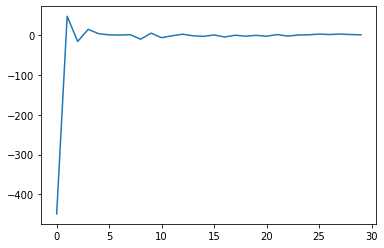

In [0]:
dataset = pd.DataFrame(X, encoder.fit_transform(y))
plt.plot(X[0])
print(X[0])

In [0]:
dataset = dataset.reset_index()
dataset.rename(columns={
    'index': 'target'
}, inplace=True)

In [0]:
dataset.head()

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,-448.938915,47.407882,-15.862984,14.442112,3.601022,0.610961,0.088243,1.286657,-10.238142,4.981804,-6.474236,-1.631047,2.319208,-1.777391,-3.030831,0.390771,-4.782948,-0.263561,-2.643305,-0.605301,-2.807643,1.440393,-2.404933,0.228501,0.750918,2.568608,1.457988,2.696922,1.415750,0.828481
1,6,-597.530326,71.844073,-3.589194,15.010749,7.562345,8.584603,5.079913,-1.165803,-8.530501,7.392229,-0.029046,2.911632,4.919144,2.696968,-0.557056,3.236604,0.462749,2.782014,-1.281723,1.455680,-2.113334,2.332957,-1.083692,1.767497,1.739174,2.744575,-0.662494,2.459523,-2.474347,-1.523756
2,2,-534.202026,39.412411,-1.820449,14.434404,-0.613531,13.865132,-8.556783,-0.939974,-11.537850,11.879477,-5.094107,2.011087,1.176359,2.994465,-2.763899,2.595437,-1.363331,-0.072466,-0.021944,1.254722,-4.357311,5.177551,-0.632091,1.321194,2.431792,2.556440,1.492255,2.745695,-0.581495,0.774913
3,6,-542.390408,58.538177,-18.411185,15.147844,3.208095,6.944355,-5.323862,-9.375724,-14.549902,9.964431,-2.151777,-2.767456,4.574551,1.586147,-2.603215,6.991284,-1.731485,-2.041674,-1.439486,0.295801,-2.715681,3.071960,-3.425849,2.862861,1.401472,0.385539,1.027753,2.434207,-2.288308,-0.975802
4,0,-572.175962,61.284077,-7.719666,20.977139,5.743182,4.252063,5.094633,-1.238540,-9.652594,8.433262,-5.859065,2.747907,4.690403,-0.106562,-1.414646,2.974597,-0.343050,1.918122,-0.529181,0.044167,-4.521850,2.354417,-2.518961,1.929664,-1.925008,0.988519,-0.569554,2.791949,-1.076641,-0.305051


In [0]:
dataset
dataset.to_csv('mfccs30.csv')

In [0]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [0]:
print(X[1], y[1])

[-5.97530326e+02  7.18440735e+01 -3.58919391e+00  1.50107489e+01
  7.56234528e+00  8.58460281e+00  5.07991282e+00 -1.16580345e+00
 -8.53050146e+00  7.39222899e+00 -2.90458670e-02  2.91163162e+00
  4.91914413e+00  2.69696785e+00 -5.57056097e-01  3.23660437e+00
  4.62748964e-01  2.78201417e+00 -1.28172269e+00  1.45568001e+00
 -2.11333361e+00  2.33295707e+00 -1.08369242e+00  1.76749652e+00
  1.73917383e+00  2.74457498e+00 -6.62494246e-01  2.45952319e+00
 -2.47434652e+00 -1.52375567e+00] 6


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Dataset ready. ML Part.

Classification Network